<a href="https://colab.research.google.com/github/taukhidwb/Prediksi-Tingkat-Polusi-Carbon-Pesawat/blob/main/Prediksi_Tingkat_Polusi_Carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Memperkirakan Tingkat Polusi Carbon**

Tujuan pembuatan aplikasi ini adalah memperkirakan tingkat polusi carbon yang dihasilkan pesawat terbang.

**Pembersihan Data**


1.   Melakukan import Data
2.   Memeriksa dan memenuhi kelengkapan Data

In [98]:
# Melakukan import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [134]:
# Melakukan import data (file "Scored_ABQ.csv") dan menampilkan datanya

df_polusi_carbon = pd.read_csv("Scored_BOS.csv")

df_polusi_carbon.head(21)

,index,airport,Carrier,Duration,price,layover,minutes,legs,plane1,plane2,aircraft_ID_1,aircraft_ID_2,Carbon Leg 1,Carbon Leg 2,Total Carbon,carbon utility,no-carbon utility,carbon prob,no-carbon prob
0,0,SMF,JetBlue Basic Economy,5h 27m,$492,NaN,327,1,Airbus A320,NaN,41,NaN,1669.74,NaN,1669.74,-5.397676,-1.771677,0.391166,0.291619
1,1,SMF,Delta Basic Economy,7h 7m,$761,SLC,427,2,Boeing 737,Boeing 737,61,61.0,370.80,1441.55,1812.35,-10.675444,-6.065689,0.001996,0.003981
2,2,SMF,United Basic Economy,7h 8m,$679,ORD,428,2,Boeing 737,Boeing 757,61,72.0,1217.25,618.52,1835.77,-9.641014,-5.210151,0.005617,0.009365
3,3,SMF,United Basic Economy,7h 14m,$847,ORD,434,2,Boeing 737,Airbus A320,61,41.0,1217.25,548.18,1765.43,-11.731510,-6.962959,0.000694,0.001623
4,4,SMF,Delta Basic Economy,7h 26m,$761,SLC,446,2,Boeing 737,Boeing 767,61,75.0,370.80,1644.73,2015.53,-10.937386,-6.065689,0.001536,0.003981
5,5,SMF,United Basic Economy,7h 27m,$558,EWR,447,2,Airbus A319,Boeing 737,40,61.0,1794.39,121.34,1915.73,-8.173131,-3.947713,0.024378,0.033096
6,6,SMF,American Basic Economy,7h 28m,$719,PHX,448,2,Airbus A319,Boeing 737,40,229.0,478.07,1098.13,1576.20,-9.825701,-5.627487,0.004670,0.006170
7,7,SMF,Sun Country Airlines Basic Economy,7h 40m,$502,MSP,460,2,Boeing 737,Boeing 737,61,61.0,1034.42,768.82,1803.24,-7.301048,-3.363443,0.058309,0.059364
8,8,SMF,American Basic Economy,7h 47m,$771,PHX,467,2,Airbus A319,Airbus A321,40,42.0,478.07,1424.44,1902.51,-10.921512,-6.170022,0.001561,0.003586
9,9,SMF,American Basic Economy,7h 52m,$849,ORD,472,2,Boeing 737,Boeing 737,229,229.0,850.87,424.35,1275.22,-11.125491,-6.983826,0.001273,0.001589


In [135]:
# Memeriksa kolom (unsur) yang mengandung missing value (NaN)

df_polusi_carbon.isnull().sum()

index                 0
airport               0
Carrier               0
Duration              0
price                 0
layover              16
minutes               0
legs                  0
plane1                0
plane2               16
aircraft_ID_1         0
aircraft_ID_2        16
Carbon Leg 1          0
Carbon Leg 2         16
Total Carbon          0
carbon utility        0
no-carbon utility     0
carbon prob           0
no-carbon prob        0
dtype: int64

In [136]:
# Memilih kolom (unsur) data yang diinginkan

kolom_terpilih = ['minutes', 'aircraft_ID_1', 'aircraft_ID_2', 'Total Carbon']
data_terpilih = df_polusi_carbon[kolom_terpilih]

# Menyimpan data terpilih ke dalam file baru (data_terpilih.csv)

data_terpilih.to_csv('data_terpilih.csv', index=False)

In [137]:
# Melakukan import data (file "data_terpilih.csv") dan menampilkan 20 data awal (pertama) dari keseluruhan baris data

df_data_terpilih = pd.read_csv("data_terpilih.csv")

# df_data_terpilih

df_data_terpilih.head(20)

# Memeriksa kolom (unsur) yang mengandung missing value (NaN)

df_data_terpilih.isnull().sum()

minutes           0
aircraft_ID_1     0
aircraft_ID_2    16
Total Carbon      0
dtype: int64

In [138]:
# Ubah missing value pada setiap kolomnya dengan 0 (nol)

df_polusi_carbon_baru = df_data_terpilih.replace(np.nan,0)
df_polusi_carbon_baru.isnull().sum()

minutes          0
aircraft_ID_1    0
aircraft_ID_2    0
Total Carbon     0
dtype: int64

In [139]:
# Melihat type data setiap kolom

df_polusi_carbon_baru.dtypes

minutes            int64
aircraft_ID_1      int64
aircraft_ID_2    float64
Total Carbon     float64
dtype: object

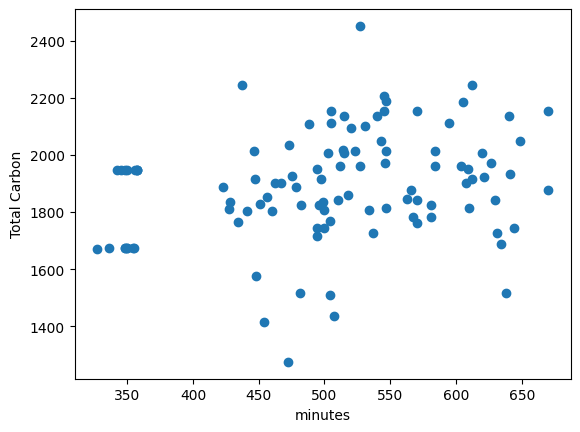

In [140]:
# Melakukan ploting data minutes vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['minutes'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("minutes")
plt.ylabel("Total Carbon")
plt.show()

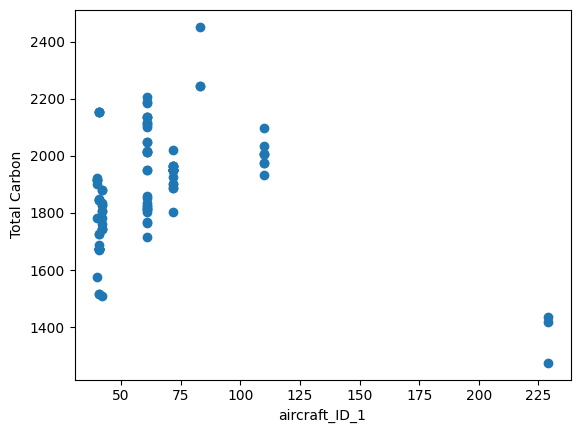

In [141]:
# Melakukan ploting data aircraft_ID_1 vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['aircraft_ID_1'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("aircraft_ID_1")
plt.ylabel("Total Carbon")
plt.show()

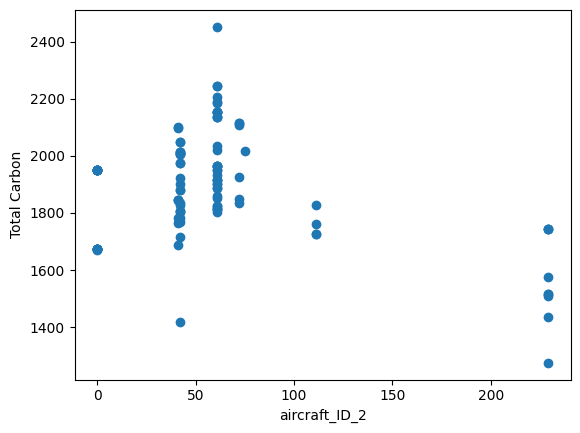

In [142]:
# Melakukan ploting data aircraft_ID_2 vs Total Carbon pada scatter plot

plt.scatter(df_polusi_carbon_baru['aircraft_ID_2'], df_polusi_carbon_baru['Total Carbon'])
plt.xlabel("aircraft_ID_2")
plt.ylabel("Total Carbon")
plt.show()

**Pengaplikasian Machine Learning**

1.   Memisahkan variabel independen (x) dan variabel dependen (y)
2.   Membagi dataset menjadi data latih (training set) dan data uji (test set)
3.   Membagi dataset menjadi data latih (training set) dan data uji (test set)
4.   Membuat objek model regresi linear
5.   Melatih model dengan data latih
6.   Memprediksi jumlah penduduk menggunakan data uji
7.   Menghitung mean squared error (MSE) untuk mengevaluasi kinerja model
8.   Menampilkan hasil prediksi dan evaluasi model

In [143]:
# Extract the x and y values from the DataFrame

x = df_polusi_carbon_baru[['minutes','aircraft_ID_1', 'aircraft_ID_2']]
y = df_polusi_carbon_baru['Total Carbon']

In [144]:
# Membagi dataset menjadi data latih (training set) dan data uji (test set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [145]:
# Membuat objek model regresi linear

model = LinearRegression()

In [146]:
# Melatih model dengan data latih

model.fit(x_train, y_train)

LinearRegression()

In [147]:
# Memprediksi

y_pred = model.predict(x_test)

In [148]:
# Menghitung mean squared error (MSE) untuk mengevaluasi kinerja model

mse = mean_squared_error(y_test, y_pred)

In [149]:
# Menampilkan hasil prediksi dan evaluasi model

print('Hasil Prediksi:', y_pred)
print('Mean Squared Error:', mse)

Hasil Prediksi: [1930.25908081 1863.35609345 1801.91778471 1882.17936053 1958.95774608
 1876.98207249 1930.2814088  2054.08667005 1757.93748799 1860.30373428
 1583.67322663 2018.85610919 1866.65388601 1856.34765673 1851.33576639
 1961.10267496 1943.70400613 1923.90892908 1997.45035054 1901.12836729
 1870.63192075]
Mean Squared Error: 25182.90156586323


In [150]:
# Menghitung RMSE (Root Mean Square)

akar = str(r2_score(y_pred, y_test))
print("R2: " + akar)

R2: -1.6886915220818608
